# <center> TRATAMENTO E ANÁLISE DE QUESTIONÁRIO <\center>
## PARTE 2: CADERNO DE GRÁFICOS E ESTATÍSTICAS
### Objectivos 
Este notebook trata os dados de 2 questionários efetuados a empreendedores e respectivas incubadoras de forma.
Os principais objectivos deste projecto são:
- Criar um dataset adequado ao tratamento estatístico
- Identificar e caracterizar as variáveis possíveis de serem extraidas do questionário
- Representar, sempre que possível graficamente as variáveis
- Facilitar a identificação de hipóteses

### Metodologia / Atividades
1. ~~Setup Inicial e pré tratamento de dados:~~
    - [x] ~~Criação de um repositório privado com ficheiros originais~~ (1|-)
    - [x] ~~Pré tratamento do ficheiros de entrada para importação~~(1|)
    - [x] ~~Inicialização do report, atividades e importação do dois datasets disponíveis~~ (-|-) 
2. ~~Limpeza dos dados~~:
    - [ ] ~~Correção / harmonização e simplificação de termos e perguntas~~ (1|))
        - [x] ~~incubados ~~
        - [ ] ~~incubadoras~~
    - [x] ~~Eliminar perguntas “merged” e criação de perguntas/variáveis individuais para cad~~ (3|)
    - [x] ~~Agrupar e simplificar respostas do tipo “lista” (por exemplo ferramentas utilizadas ou problemas mais frequentes)~~ (2|)
    - [x] ~~Preenchimento de valores omissos e correção de strings(texto)~~ (1|)
    - [x] ~~Simplificação de categorias (por exemplo classes de idades)~~ (1|))
    - [x] ~~Criar variáveis categóricas para as perguntas abertas~~ (x)
4. Análise de dados
    - [x] Criação de estatísticas simples (cerca de 80 variáveis) (3)
    - [x] Identificação das variáveis mais relevantes, analise e criação de plots para essas (até 10) (5-6h)
    

# <CENTER> 4. Estatísticas Descritivas e Visualização Exploratória

Este relatório apresenta a caracterização possível das variáveis de interesse para os objectivos, através das estaticas descritivas simples, visualização mais adequada e breve análise.

A base de dados, após limpeza e tratamento apresenta 57 colunas/variáveis e 64 registos.
Por não apresentarem relevancia e de modo a anonimizar os dados, serão excluidas da análise as seguintes colunas: 

|Index|Coluna / Variável         |Tipo |Justificação|
|:-:|:---------------------------|:----|:-------|
|1 |p_name                       | text|nome do empreendor, dado sensível|
|6 |c_name                       | text|nome da empresa, sem significado estatistico|
|7 |c_location                   | text|corresponde à localizaçao da incubadora, dado redundante, rever|


## Estrutura do relatório /temas

0. Caracterização geral da base de dados
1. Dados dos empreendedores
    - Idade, genero, nivel de escolaridade
2. Dados das empresas incubadas
    - sector de atividade
    - numero de colaboradores, idade, dimensoa e estágio de incubaçao
    - Tempo de residencia na incubadora
    - dificuldades sentidas
3. Desempenho da Incubadora
    - Valor acrescentado pela incubadora
    - transferencia de conhecimento e ferramentas utilizadas
    - resultados obtidos das incubadoras
4. Incubadoras 
    - Distribuiçao de incubados pelas incubadoras
    - ligacoes a universisade

In [2]:
#importing modules used for plotting and analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
import seaborn as sns
#from gapminder import gapminder # import data set 
pd.set_option('display.max_columns', 60)


In [3]:
#importing datatypes from the cleaned dataset
import json
with open('./data_output/incubados_dtypes.json', 'r') as j:
    incubados_types = json.load(j)
#importing the clean dataset
survey = pd.read_csv('./data_output/incubados.csv', index_col=0, dtype=incubados_types)

In [4]:
#eliminar as colunas sem relevancia 
survey.drop(['p_name','c_name','c_location'],axis=1, inplace=True)

# 0. Caracterização Geral da Base de Dados

Após o tratamento de dados efetuado, e eliminar as colunas acimas considerdas, partimos de 53 colunas que representam variáveis, na sua maioria categoricas que representam as respostas às várias opçoes disponibilizadas

In [5]:
survey.info() #lista de todas as variáveis e respectivos tipos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 1 to 64
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   p_age                          64 non-null     category
 1   p_gender                       64 non-null     category
 2   p_literacy                     64 non-null     category
 3   inc_name                       64 non-null     category
 4   c_employees                    64 non-null     category
 5   c_age                          63 non-null     category
 6   c_inapem?                      63 non-null     boolean 
 7   c_size                         64 non-null     category
 8   c_resident_years               64 non-null     float64 
 9   c_stage                        64 non-null     category
 10  c_linkto_inc                   64 non-null     category
 11  c_inc_link_uni?                59 non-null     boolean 
 12  c_inc_pos_support?             49 non-

Os 5 primeiros registos da base de dados:

In [6]:
#Sample da base de dados (5 primeiros registos)
survey.head(5)

,p_age,p_gender,p_literacy,inc_name,c_employees,c_age,c_inapem?,c_size,c_resident_years,c_stage,c_linkto_inc,c_inc_link_uni?,c_inc_pos_support?,c_act_sector_O,c_act_sector_K,c_act_sector_H,c_act_sector_M,c_act_sector_A,c_act_sector_C,c_act_sector_F,c_act_sector_J,c_act_sector_E,c_act_sector_G,c_act_sector_I,c_act_sector_N,c_knw_trans_mrkt,c_knw_trans_hr,c_knw_trans_sales,c_knw_trans_legal,c_knw_trans_entrpre,c_knw_trans_strt,c_knw_trans_finc,c_knw_trans_tool_manuais,c_knw_trans_tool_training,c_knw_trans_tool_benchmarking,c_knw_trans_tool_forums,c_dif_funds,c_dif_bplan,c_dif_place,c_dif_manag_xp,c_dif_skills,c_dif_entrep,c_inc_value_manag_tools,c_inc_value_tek_res,c_inc_value_new_prod,c_inc_value_network,c_inc_value_markt,c_inc_value_divisas,c_inc_value_credit,c_inc_result_network_oport,c_inc_result_senior_partn,c_inc_result_image,c_inc_result_rent,c_inc_result_wifi
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,55-64,Masculino,Licenciatura,CLESE Cabinda,10 - 100,6 - 10,False,Pequena,1.0,Incubação,Bom,True,True,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False
2,25-34,Feminino,Licenciatura,CLESE Dundo,10 - 100,1 - 2,True,Pequena,1.0,Incubação,Bom,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False
3,18-24,Feminino,Licenciatura,CLESE Huambo,1 - 10,0 - 1,False,Micro,0.5,Incubação,Bom,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
4,25-34,Masculino,Mestrado,CLESE Huambo,1 - 10,3 - 5,False,Micro,2.0,Incubação,Óptimo,<NA>,<NA>,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
5,25-34,Masculino,Licenciatura,CLESE Huambo,10 - 100,3 - 5,False,Pequena,3.0,Incubação,Bom,<NA>,<NA>,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,True,False,False,False,True,True,False,False,True,False,False,False,True,True,False,False


O tratamento anterior permitiu eliminar a maior parte de valores omissos, excepto (como se pode ver no heatmap seguinte) um numero significativo de valores nulos na coluna 'c_inc_pos_support?' que corresponde  à pergunta: A incubadora continua a apoiar após a sua saída da incubadora?

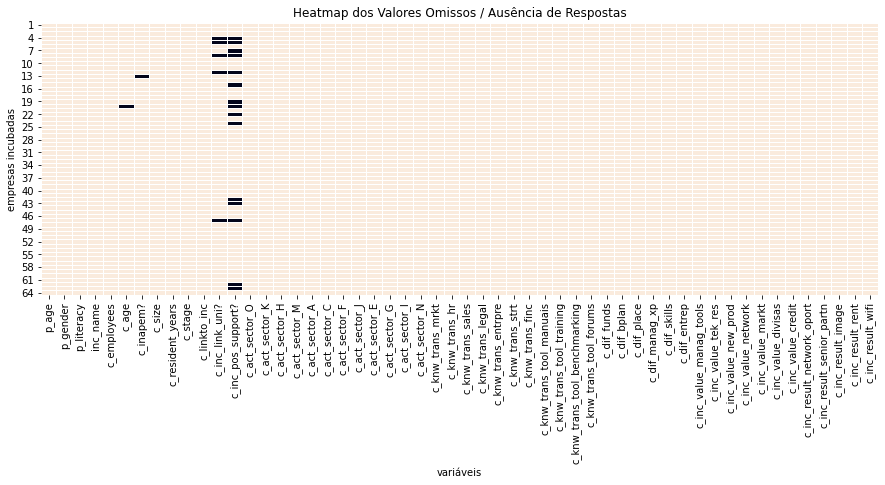

In [7]:
# Mapa de valores omissos 
plt.figure(figsize=(15,5))
sns.heatmap(survey.notnull(), linewidths=1, cbar=False)
plt.xlabel("variáveis")
plt.ylabel("empresas incubadas")
plt.title("Heatmap dos Valores Omissos / Ausência de Respostas")
plt.show()

O mapa de correlações indica uma predominancia ausência de variáveis sem associação, indicando contudo, algumas sugestões de análise adicional entre:
   - ferramentas de transferência de conhecimento e sectores de atividade
   - entre as opçoes de resposta à mesma pergunta (indicando uma possível redundância nas opções)

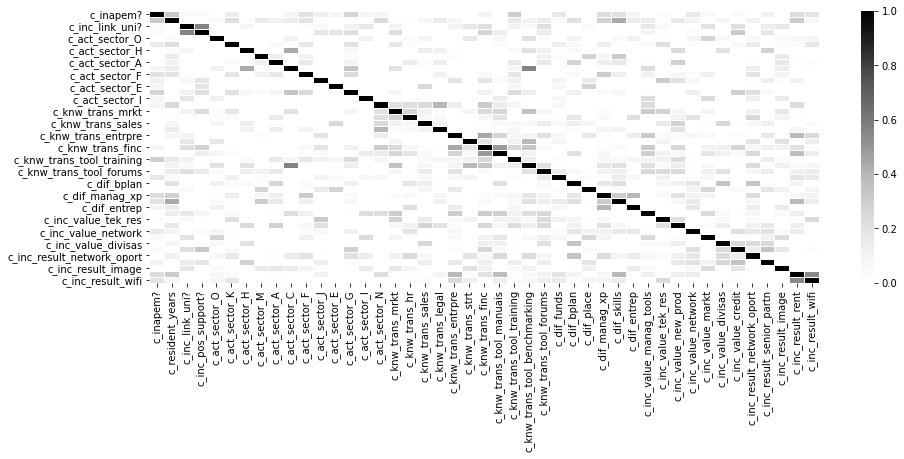

In [8]:
#Mapa de correlações 
f, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(survey.corr(), annot=False, linewidths=.5, ax=ax, cmap=plt.cm.Greys, vmin=.0)
plt.show()


# <center> 1. Dados relativos aos empreendedores

|Index|Coluna / Variável         |Tipo |Interesse|
|:-:|:---------------------------|:----|:-------:|
|0 |p_age                        | categorica|[x]|
|1 |p_gender                     | categorica|[x]|
|2 |p_literacy                   | categorica|[x]|

Após eliminar o nome do empreendedor e da respetiva empresa, que se consideram sem relevancia para a análise, restam 3 variaveis, idade, genero e nivel de escolariade. 

In [9]:
survey[survey.columns[:3]].describe()

,p_age,p_gender,p_literacy
count,64,64,64
unique,4,2,3
top,25-34,Masculino,Licenciatura
freq,42,57,40


O perfil mais frequente para o empreendedor é um indivíduo do genero masculino, com idade entre os 25 e os 34 anos com uma licenciatura.

In [10]:
#definiçoes de cores para os graficos
from cycler import cycler
colors = plt.cm.gray(np.linspace(0.5,0.8,5))
plt.rcParams['axes.prop_cycle'] = cycler(color=colors)

### Idade

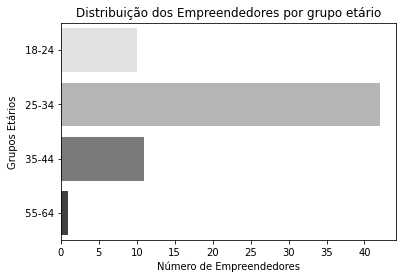

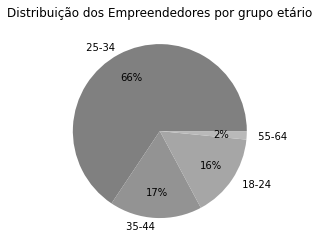

In [11]:
#age
#survey['p_age'].value_counts().plot(kind='bar')
sns.countplot(y='p_age', data=survey, palette='Greys')
plt.title('Distribuição dos Empreendedores por grupo etário')
plt.ylabel('Grupos Etários')
plt.xlabel('Número de Empreendedores')
plt.show()


survey['p_age'].value_counts().plot(kind='pie', autopct='%1.0f%%', pctdistance=0.7)
plt.title('Distribuição dos Empreendedores por grupo etário')
plt.ylabel('')
plt.show()

A maior parte dos empreendedores têm idades entre os 25 e os 34 anos. 

### Género

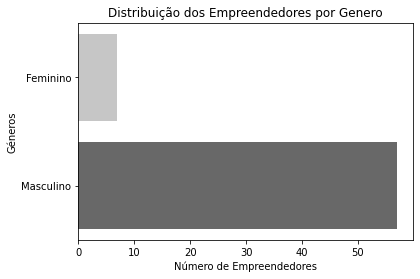

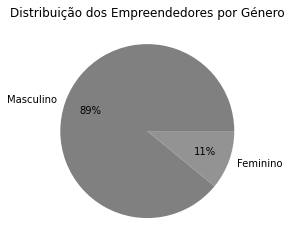

In [11]:
#gender 
#survey['p_gender'].value_counts().plot(kind='bar')
sns.countplot(y='p_gender', data=survey, palette='Greys')
plt.title('Distribuição dos Empreendedores por Genero')
plt.ylabel('Géneros')
plt.xlabel('Número de Empreendedores')
plt.show()

survey['p_gender'].value_counts().plot(kind='pie', autopct='%1.0f%%', pctdistance=0.7)
plt.title('Distribuição dos Empreendedores por Género')
plt.ylabel('')
plt.show()


A grande maioria dos empreendedores é do genero masculino.

### Nível de Escolaridade

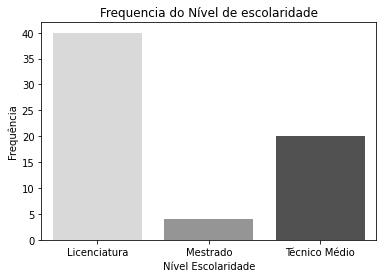

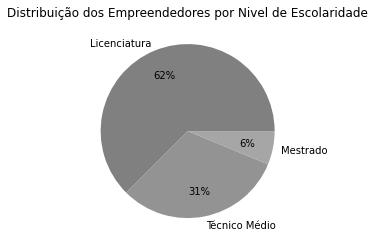

In [12]:
#literacy
sns.countplot(x='p_literacy', data=survey, palette='Greys')
plt.title('Frequencia do Nível de escolaridade')
plt.xlabel('Nível Escolaridade')
plt.xticks(rotation=0)
plt.ylabel('Frequência')
plt.show()

survey['p_literacy'].value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=0.7)
plt.title('Distribuição dos Empreendedores por Nivel de Escolaridade')
plt.ylabel('')
plt.show()



Mais de metade dos empreendedores têm licenciatura.

Abaixo mostra-se a distribuição das idades em cada nível de escolaridade. 

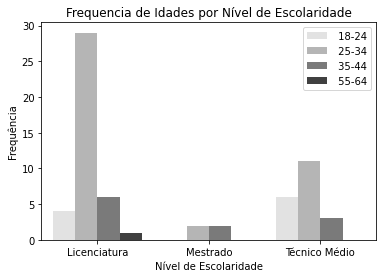

In [13]:
#distribuição de idades por nivel de escolaridade
sns.countplot(x='p_literacy', hue='p_age', data=survey, palette='Greys')
plt.title('Frequencia de Idades por Nível de Escolaridade')
plt.xlabel('Nível de Escolaridade')
plt.ylabel('Frequência')
plt.legend()
plt.show()

# <center>2. Dados relativos às empresas incubadas
Considerando o elavado numero de varáveis, vamos "partir" a análise em seçoes.


|Index|Coluna / Variável         |Tipo |Interesse|
|:-:|:---------------------------|:----|:-------:|
|4 |c_employees                  | categorica|[x]|
|5 |c_age                        | categorica|[x]|
|6|c_inapem?                    | bool|[x]|
|7|c_size                       | categorica|[x]|
|8|c_resident_years             | float|[x]|
|9|c_stage                      | categorica|[x]|
|10|c_linkto_inc                 | bool|[x]|
|11|c_inc_link_uni?              | bool|[x]|
|12|c_inc_pos_support?           | bool|[x]|

### Número de colaboradores e dimensao da empresa : 'c_employees'  e 'c_size'

In [14]:
survey[['c_employees','c_size']].value_counts()

c_employees  c_size 
1 - 10       Micro      41
             Pequena    12
10 - 100     Pequena     9
             Micro       2
dtype: int64

As duas variaveis poderão ser redundantes. O intervalo "parte" nas 10 empresas mas nao se sabe se os limites estao incluidos (repetem nos dois grupos). 
Alert -> Existem pelo menos 2 micro empresas com 10 ou mais empregados. 
Independentemente da redundancia, a maioria das empresa sao micro empresa com 10 ou menos colaboradores. 

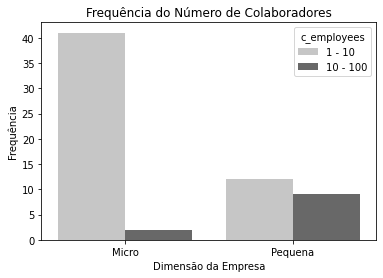

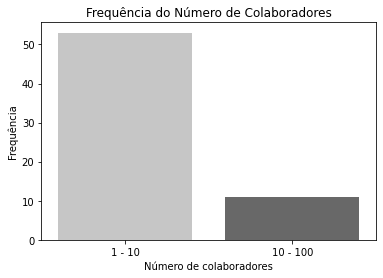

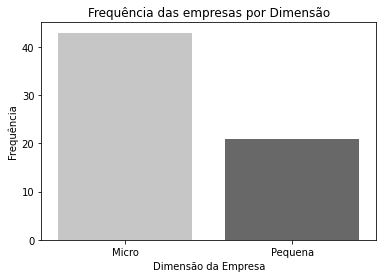

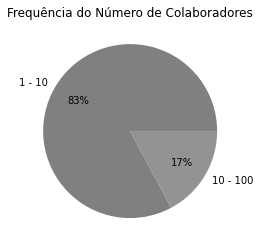

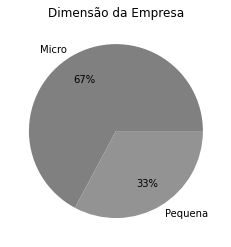

In [12]:
#colaboradores - 'c_employees'
sns.countplot(x='c_size', hue='c_employees' ,data=survey, palette='Greys')
plt.title('Frequência do Número de Colaboradores')
plt.xlabel('Dimensão da Empresa')
plt.xticks(rotation=0)
plt.ylabel('Frequência')
plt.show()

sns.countplot(x='c_employees' ,data=survey, palette='Greys')
plt.title('Frequência do Número de Colaboradores')
plt.xlabel('Número de colaboradores')
plt.xticks(rotation=0)
plt.ylabel('Frequência')
plt.show()

sns.countplot(x='c_size' ,data=survey, palette='Greys')
plt.title('Frequência das empresas por Dimensão')
plt.xlabel('Dimensão da Empresa')
plt.xticks(rotation=0)
plt.ylabel('Frequência')
plt.show()

survey['c_employees'].value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=0.7)
plt.title('Frequência do Número de Colaboradores')
plt.ylabel('')
plt.show()

survey['c_size'].value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=0.7)
plt.title('Dimensão da Empresa')
plt.ylabel('')
plt.show()


### Idade das empresas : 'c_age' e tempo de Residencia 'c_resident_years'


**Idade das empresas:**

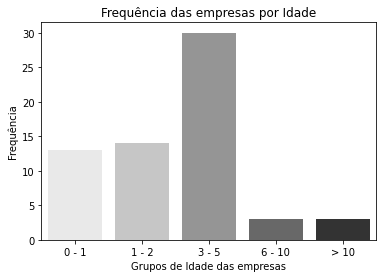

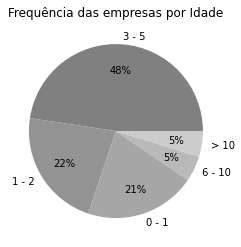

In [16]:
#company age 
sns.countplot(x='c_age' ,data=survey, palette='Greys')
plt.title('Frequência das empresas por Idade')
plt.xlabel('Grupos de Idade das empresas')
plt.xticks(rotation=0)
plt.ylabel('Frequência')
plt.show()

survey['c_age'].value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=0.7)
plt.title('Frequência das empresas por Idade')
plt.ylabel('')
plt.show()


A distribuiçao da dimensao das empresas pela idade mostra uma maior proporçao de micro empresas nas emresas mais jovens, como seria de esperar. 

<AxesSubplot:xlabel='c_age', ylabel='count'>

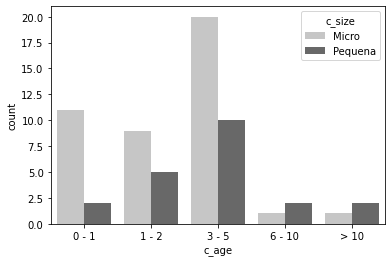

In [17]:
sns.countplot(x='c_age', hue='c_size',data=survey, palette='Greys')

**Tempo de residência:**

Sendo a unica variável númerica (convertida durante o tratamento), é possivel determinar um conjunto de estatisticas simples: (total de observaçoes, média, desvio padrão, minimo, Percentil 25, 50 e 75 e máximo.

In [18]:
survey['c_resident_years'].describe()

count    64.000000
mean      1.585938
std       1.226541
min       0.500000
25%       0.500000
50%       1.000000
75%       3.000000
max       4.000000
Name: c_resident_years, dtype: float64

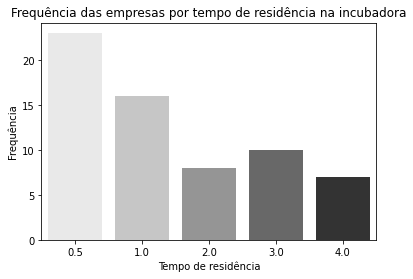

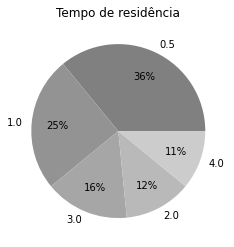

In [19]:
#resident years
sns.countplot(x='c_resident_years', data=survey, palette='Greys')
plt.title('Frequência das empresas por tempo de residência na incubadora')
plt.xlabel('Tempo de residência')
plt.xticks(rotation=0)
plt.ylabel('Frequência')
plt.show()

survey['c_resident_years'].value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=0.7)
plt.title('Tempo de residência')
plt.ylabel('')
plt.show()


### Certificação INAPEM

In [20]:
data = survey['c_inapem?'].value_counts(dropna=False)
data

True     42
False    21
NaN       1
Name: c_inapem?, dtype: Int64

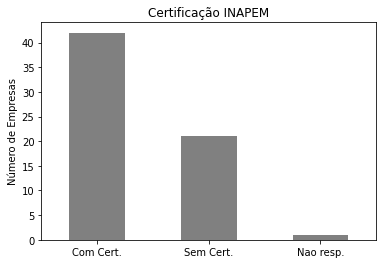

In [21]:
data.plot(kind='bar')
plt.xticks(np.arange(3), ['Com Cert.', 'Sem Cert.', 'Nao resp.'], rotation=0)  # Set text labels.
plt.title('Certificação INAPEM')
plt.ylabel('Número de Empresas')
plt.xlabel('')
plt.show()


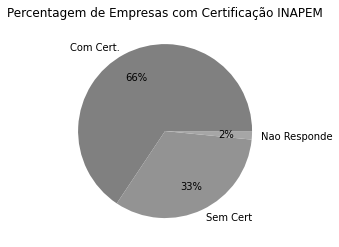

In [22]:
labels = ['Com Cert.', 'Sem Cert', 'Nao Responde']
data.plot(labels=labels, kind='pie',autopct='%1.0f%%', pctdistance=0.7)
plt.title('Percentagem de Empresas com Certificação INAPEM')
plt.ylabel('')
plt.show()

###  Fase de incubação  'c_stage' 
A maior parte das empresas encontram-se em fase de incubação.

In [23]:
survey['c_stage' ].value_counts()

Incubação          41
Pré - Incubação    17
Pós - Incubação     5
Graduação           1
Name: c_stage, dtype: int64

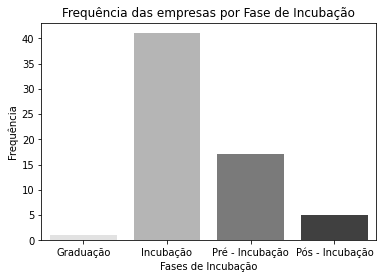

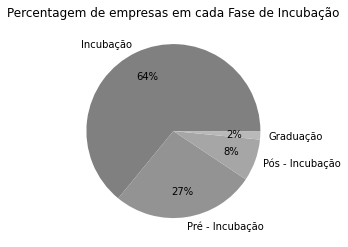

In [24]:
#estágio de incubação 

sns.countplot(x='c_stage', data=survey, palette='Greys')
plt.title('Frequência das empresas por Fase de Incubação')
plt.xlabel('Fases de Incubação')
plt.xticks(rotation=0)
plt.ylabel('Frequência')
plt.show()

survey['c_stage'].value_counts().plot(kind='pie',autopct='%1.0f%%', pctdistance=0.7)
plt.title('Percentagem de empresas em cada Fase de Incubação')
plt.ylabel('')
plt.show()

Abaixo a relação entre o tempo em que a empresa está na incubadora, e o seu estágio de incubação. Algumas observações merecem destaque, como um numero relevante de empresas com mais de 4 anos e ainda em fase de incubação. 

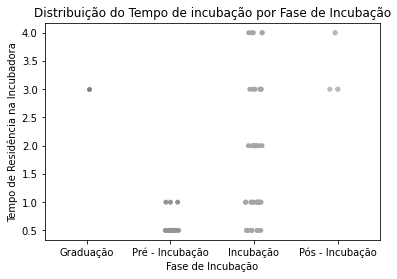

In [25]:
#relaçao entre estagio de incubaçao e tempo na incubadora

sns.stripplot(x='c_stage', y='c_resident_years', data=survey, order=["Graduação", "Pré - Incubação", "Incubação","Pós - Incubação"])
plt.title('Distribuição do Tempo de incubação por Fase de Incubação')
plt.xlabel('Fase de Incubação')
plt.xticks(rotation=0)
plt.ylabel('Tempo de Residência na Incubadora')
plt.show()

###   <center> Sectores de atividade 'c_act_sector_x'
    
|Index|Coluna / Variável         |Tipo |Interesse|
|:-:|:---------------------------|:----|:-------:|
|13|c_act_sector_O               | bool|[x]|
|14|c_act_sector_K               | bool|[x]|
|15|c_act_sector_H               | bool|[x]|
|16|c_act_sector_M               | bool|[x]|
|17|c_act_sector_A               | bool|[x]|
|18|c_act_sector_C               | bool|[x]|
|19|c_act_sector_F               | bool|[x]|
|20|c_act_sector_J               | bool|[x]|
|21|c_act_sector_E               | bool|[x]|
|22|c_act_sector_G               | bool|[x]|
|23|c_act_sector_I               | bool|[x]|
|24|c_act_sector_N               | bool|[x]|


Total de empresas em cada sector

In [26]:
survey.iloc[:,13:24].sum()

c_act_sector_O    34
c_act_sector_K    11
c_act_sector_H     5
c_act_sector_M     6
c_act_sector_A     4
c_act_sector_C     1
c_act_sector_F     5
c_act_sector_J     2
c_act_sector_E     1
c_act_sector_G     8
c_act_sector_I     1
dtype: int64

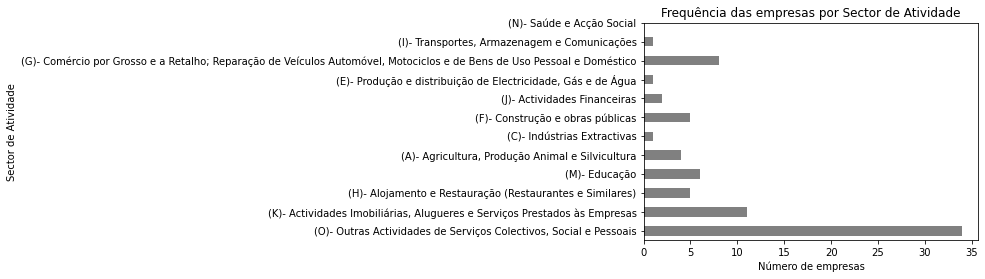

In [27]:
#sector de atividade
sectores = ['(O)- Outras Actividades de Serviços Colectivos, Social e Pessoais',
            '(K)- Actividades Imobiliárias, Alugueres e Serviços Prestados às Empresas',
            '(H)- Alojamento e Restauração (Restaurantes e Similares)',
            '(M)- Educação',
            '(A)- Agricultura, Produção Animal e Silvicultura',
            '(C)- Indústrias Extractivas',
            '(F)- Construção e obras públicas',
            '(J)- Actividades Financeiras',
            '(E)- Produção e distribuição de Electricidade, Gás e de Água',
            '(G)- Comércio por Grosso e a Retalho; Reparação de Veículos Automóvel, Motociclos e de Bens de Uso Pessoal e Doméstico',
            '(I)- Transportes, Armazenagem e Comunicações',
            '(N)- Saúde e Acção Social']
data= survey.iloc[:,13:24].sum()
data.plot(kind='barh')
plt.yticks(np.arange(12), sectores, rotation=0)  # Set text labels.
plt.title('Frequência das empresas por Sector de Atividade')
plt.xlabel('Número de empresas')
plt.ylabel('Sector de Atividade')
plt.show()

###  <center> Tipos de conhecimento e ferramentas transferencia entre a incubadora e a empresa

|Index|Coluna / Variável         |Tipo |Interesse|
|:-:|:---------------------------|:----|:-------:|
|25|c_knw_trans_mrkt             | bool|[x]|
|%|c_knw_trans_hr               | bool|[x]|
|%|c_knw_trans_sales            | bool|[x]|
|%|c_knw_trans_legal            | bool|[x]|
|%|c_knw_trans_entrpre          | bool|[x]|
|%|c_knw_trans_strt             | bool|[x]|
|%|c_knw_trans_finc             | bool|[x]|
|%|c_knw_trans_tool_manuais     | bool|[x]|
|%|c_knw_trans_tool_training    | bool|[x]|
|%|c_knw_trans_tool_benchmarking| bool|[x]|
|%|c_knw_trans_tool_forums      | bool|[x]|

Totais dos tipologias de conhecimento

In [28]:
known = survey[survey.columns[25:32]]
known.sum()

c_knw_trans_mrkt       18
c_knw_trans_hr         16
c_knw_trans_sales      13
c_knw_trans_legal       6
c_knw_trans_entrpre    29
c_knw_trans_strt        2
c_knw_trans_finc        9
dtype: int64

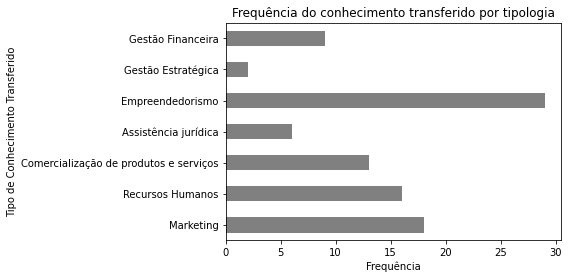

In [29]:
#tipologias de conhecimento transferido
labels = ['Marketing', 
          'Recursos Humanos',
          'Comercialização de produtos e serviços',
          'Assistência jurídica',
          'Empreendedorismo', 
          'Gestão Estratégica', 
          'Gestão Financeira']
known.sum().plot(kind='barh')
plt.yticks(np.arange(7), labels, rotation=0)  # Set text labels.
plt.title('Frequência do conhecimento transferido por tipologia')
plt.xlabel('Frequência')
plt.ylabel('Tipo de Conhecimento Transferido')
plt.show()

Totais das ferramentas de transferencia de conhecimento utilizadas

In [30]:
tools = survey[survey.columns[32:36]]
tools.sum()

c_knw_trans_tool_manuais         26
c_knw_trans_tool_training        46
c_knw_trans_tool_benchmarking     3
c_knw_trans_tool_forums           5
dtype: int64

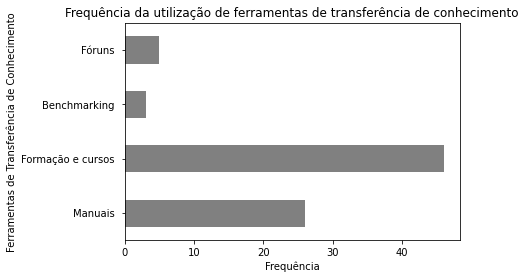

In [31]:
#tipologias de ferraments de transferencia
labels = ['Manuais ', 'Formação e cursos ', 'Benchmarking ', 'Fóruns ']
tools.sum().plot(kind='barh')
plt.yticks(np.arange(4), labels, rotation=0)  # Set text labels.
plt.title('Frequência da utilização de ferramentas de transferência de conhecimento')
plt.xlabel('Frequência')
plt.ylabel('Ferramentas de Transferência de Conhecimento')
plt.show()

###  <center> Tipos de dificuldades encontradas

|Index|Coluna / Variável         |Tipo |Interesse|
|:-:|:---------------------------|:----|:-------:|
|36 | c_dif_funds                |bool| [x] | 
|37 | c_dif_bplan                |bool| [x] | 
|38 | c_dif_place                |bool| [x] | 
|39 | c_dif_manag_xp             |bool| [x] | 
|40 | c_dif_skills               |bool| [x] | 
|41 | c_dif_entrep               |bool| [x] | 

Totais das dificuldades identificadas pelos empreendedores

In [32]:
dif = survey[survey.columns[36:42]]
dif.sum()

c_dif_funds       51
c_dif_bplan        9
c_dif_place       11
c_dif_manag_xp     6
c_dif_skills       5
c_dif_entrep       1
dtype: int64

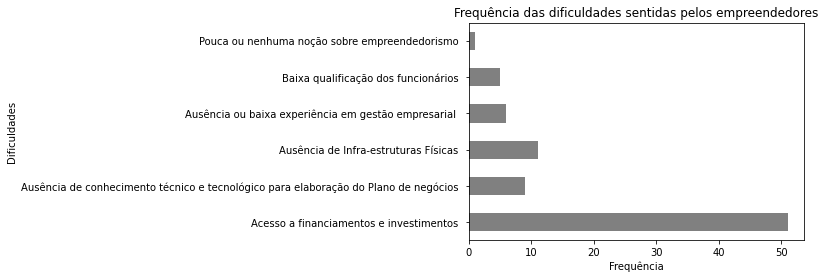

In [33]:
#tipologias de difculdes - grafico
labels = [
    'Acesso a financiamentos e investimentos ',
    'Ausência de conhecimento técnico e tecnológico para elaboração do Plano de negócios ',
    'Ausência de Infra-estruturas Físicas ',
    'Ausência ou baixa experiência em gestão empresarial  ',
    'Baixa qualificação dos funcionários ',
    'Pouca ou nenhuma noção sobre empreendedorismo ',
    ]
dif.sum().plot(kind='barh')
plt.yticks(np.arange(6), labels, rotation=0)  # Set text labels.
plt.title('Frequência das dificuldades sentidas pelos empreendedores')
plt.xlabel('Frequência')
plt.ylabel('Dificuldades')
plt.show()

### <center> Tipos de Valor adicionado pela incubadora

|Index|Coluna / Variável         |Tipo |Interesse|
|:-:|:---------------------------|:----|:-------:|
|42 | c_inc_value_manag_tools    | bool|[x]|
| 43|  c_inc_value_tek_res       | bool|[x]| 
| 44|  c_inc_value_new_prod      | bool|[x]| 
| 45|  c_inc_value_network       | bool|[x]| 
| 46|  c_inc_value_markt         | bool|[x]| 
| 47|  c_inc_value_divisas       | bool|[x]| 
| 48|  c_inc_value_credit        | bool|[x]| 

Totais de valor adicionado

In [34]:
value = survey[survey.columns[42:49]]
value.sum()

c_inc_value_manag_tools    15
c_inc_value_tek_res        16
c_inc_value_new_prod        8
c_inc_value_network        22
c_inc_value_markt          14
c_inc_value_divisas         3
c_inc_value_credit          4
dtype: int64

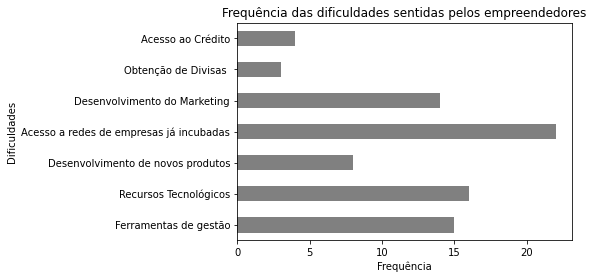

In [35]:
#tipologias de difculdes - grafico
labels = ['Ferramentas de gestão', 'Recursos Tecnológicos',
       'Desenvolvimento de novos produtos',
       'Acesso a redes de empresas já incubadas',
       'Desenvolvimento do Marketing', 'Obtenção de Divisas ',
       'Acesso ao Crédito']
value.sum().plot(kind='barh')
plt.yticks(np.arange(7), labels, rotation=0)  # Set text labels.
plt.title('Frequência das dificuldades sentidas pelos empreendedores')
plt.xlabel('Frequência')
plt.ylabel('Dificuldades')
plt.show()

### <center> Tipos de resultados obtidos pela incubação</center>

|Index|Coluna / Variável         |Tipo |Interesse|
|:-:|:---------------------------|:----|:-------:|
|49 | c_inc_result_network_oport |bool|[x]| 
|50 | c_inc_result_senior_partn  |bool|[x]| 
|51 | c_inc_result_image         |bool|[x]| 
|52 | c_inc_result_rent          |bool|[x]| 
|53 | c_inc_result_wifi          |bool|[x]| 

Totais de resultados obtidos

In [36]:
res = survey[survey.columns[49:]]
res.sum()

c_inc_result_network_oport    30
c_inc_result_senior_partn     13
c_inc_result_image            27
c_inc_result_rent             15
c_inc_result_wifi             13
dtype: int64

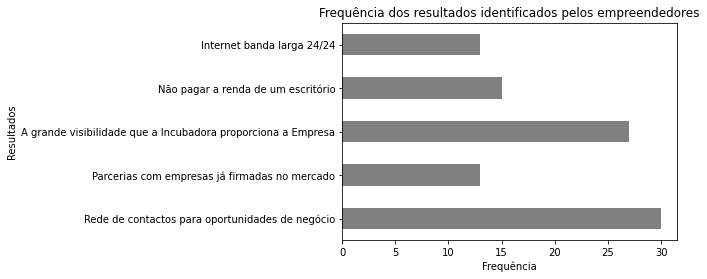

In [37]:
#tipologias de difculdes - grafico
labels = ['Rede de contactos para oportunidades de negócio',
       'Parcerias com empresas já firmadas no mercado',
       'A grande visibilidade que a Incubadora proporciona a Empresa',
       'Não pagar a renda de um escritório', 'Internet banda larga 24/24']
res.sum().plot(kind='barh')
plt.yticks(np.arange(5), labels, rotation=0)  # Set text labels.
plt.title('Frequência dos resultados identificados pelos empreendedores')
plt.xlabel('Frequência')
plt.ylabel('Resultados')
plt.show()

<center><h1>Outros indicadores desempenho da Incubadora</center>
   
|Index|Coluna / Variável         |Tipo |Interesse|
|:-:|:---------------------------|:----|:-------:|
|3 |  inc_name                  | category|[x]|
|10|c_linkto_inc                 | bool|[x]|
|11|c_inc_link_uni?              | bool|[x]|
|12|c_inc_pos_support?           | bool|[x]|





In [38]:
### Incubadoras

<AxesSubplot:>

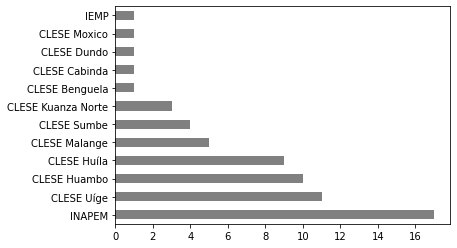

In [39]:
survey['inc_name'].value_counts().plot(kind='barh')